Drzewa decyzyjne
---

Zaczniemy od próby wytrenowania drzewa na zbiorze syntetycznym. W tym celu wygenerujemy dane syntetyczne.|

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from datasets import plot_space

In [3]:
# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))
train_labels = np.hstack((np.zeros(100), np.ones(100)))

Spróbujmy wytrenować na nich klasyfikator i zwalidować go.

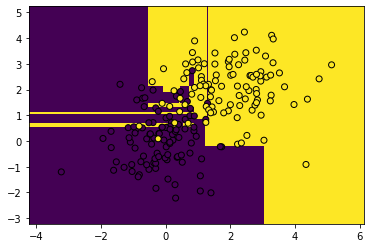

In [5]:
from sklearn.tree import DecisionTreeClassifier

plot_space(DecisionTreeClassifier(), train_data, train_labels)

In [7]:
from sklearn.datasets.samples_generator import make_moons
X, y = make_moons(n_samples=100, noise=0.05)

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


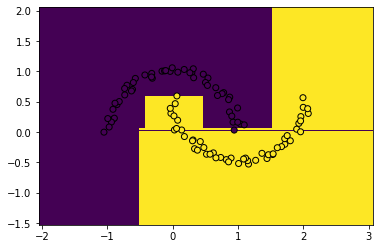

In [8]:
plot_space(DecisionTreeClassifier(), X, y)

Wyświetlanie drzewa - by zbadać parametry i progi

In [10]:
from sklearn.tree import plot_tree
from datasets import read_dataset

X, y, classes = read_dataset('iris', 'species')

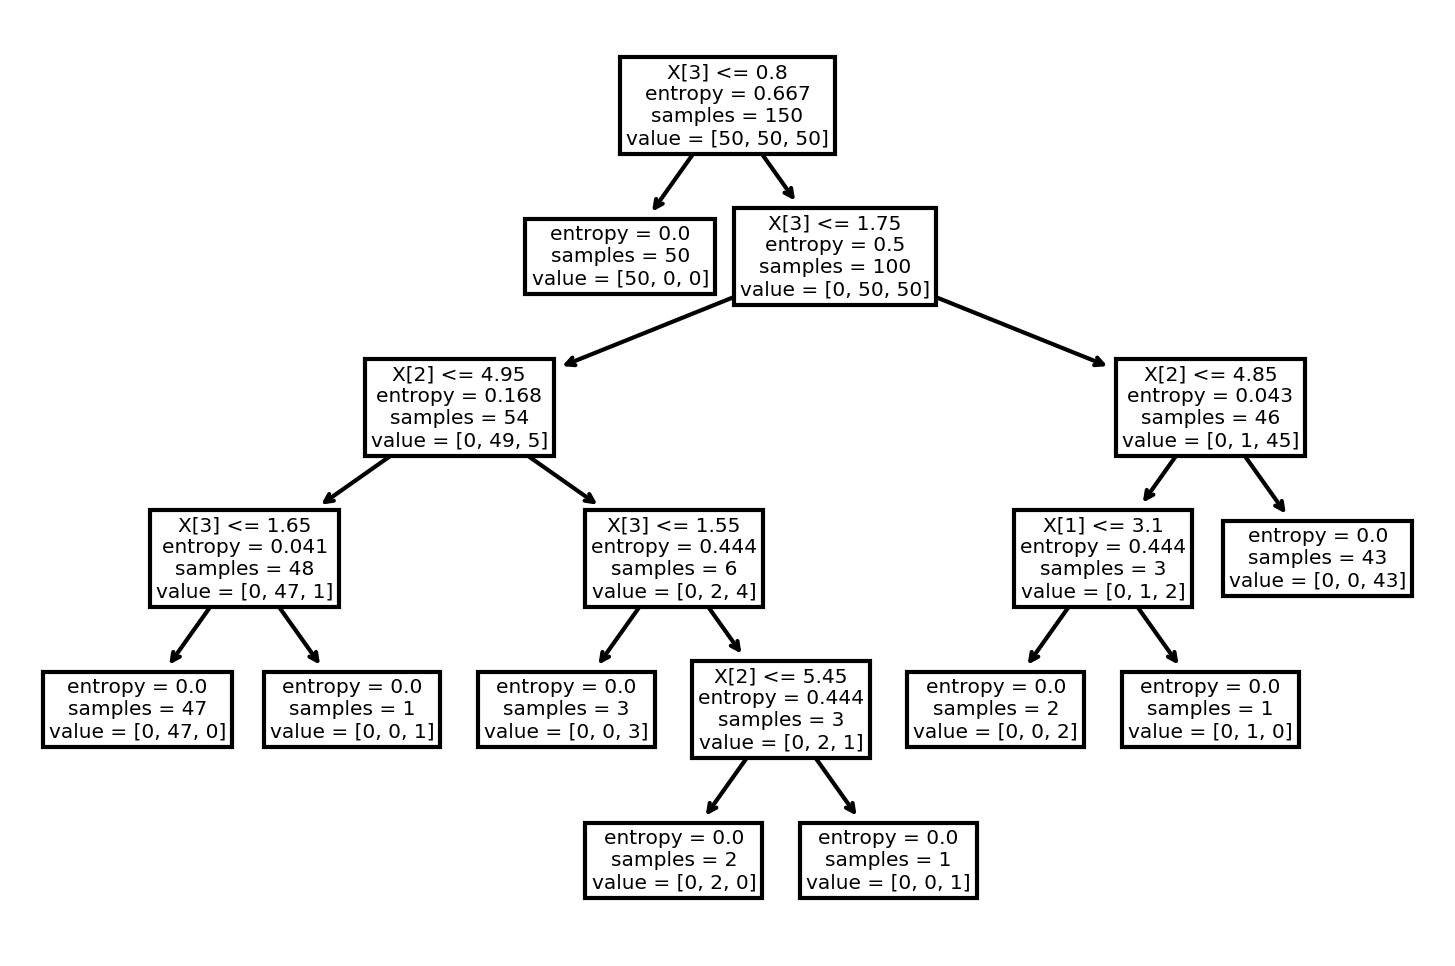

In [11]:
plt.figure(dpi=300)
clf = DecisionTreeClassifier().fit(X, y)
plot_tree(clf)
plt.show()

Próba na rzeczywistych danych - spróbuj zbadać wybrane parametry modelu ([dokumentacja](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)).

Results for DecisionTree-default
----
  Accuracy:  0.616822429906542
  Precision: 0.5748315357423518
  Recall:    0.6075482553143491
  F1 score:  0.5895367279331823
  Mislabeled 82 out of 214




/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


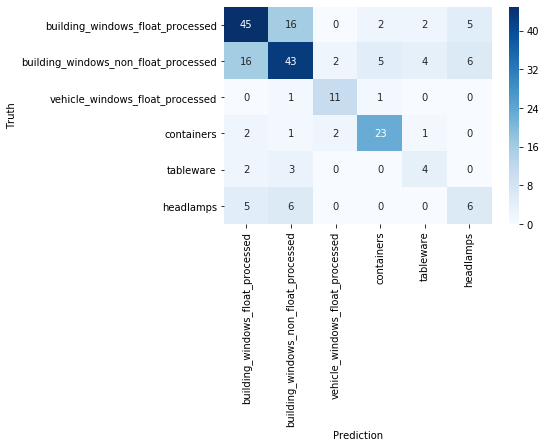

In [16]:
from sklearn.model_selection import StratifiedKFold
from datasets import print_results, plot_cm, cross_validate

X, y, classes = read_dataset('glass', 'Type', 'ID')

metrics, cm = cross_validate(DecisionTreeClassifier, StratifiedKFold(10), X, y)
print_results(metrics, 'DecisionTree-default')
plot_cm(cm, classes)